# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [136]:
# your code here

  
dice = [1, 2, 3, 4, 5, 6]  
  
dice_rolls = [random.choice(dice) for x in range(10)]
dice_rolls

[5, 6, 2, 1, 4, 5, 2, 2, 3, 6]

In [56]:
    
#dice_roll = pd.DataFrame(dice_rolls, columns = dice)
dice_roll = pd.DataFrame(dice_rolls, columns=['roll'])
dice_roll.head(10)


,roll
0,4
1,3
2,2
3,3
4,3
5,6
6,5
7,3
8,6
9,5


#### 2.- Plot the results sorted by value.

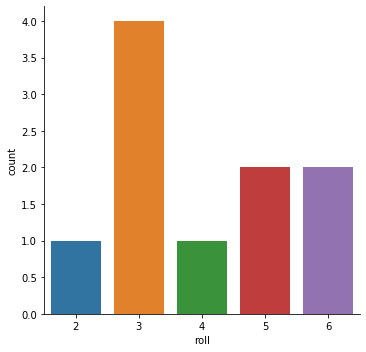

In [57]:
# your code here
sns.catplot(x="roll", kind="count", data=dice_roll)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

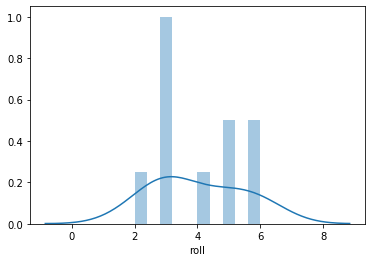

In [58]:
# your code here

sns.distplot(dice_roll['roll'], bins=10)

In [59]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [60]:
# your code here
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

mean(dice_rolls)

4.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [62]:
# your code here


new_dict_comp = {item:dice_rolls.count(item) for item in dice_rolls}
new_dict_comp

{4: 1, 3: 4, 2: 1, 6: 2, 5: 2}

In [63]:

new_mean =sum([list(new_dict_comp.values())[x] * (list(new_dict_comp.keys())[x])for x in range(len(list(new_dict_comp.keys())))])/ sum(list(new_dict_comp.values()))
new_mean
    

4.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

4

In [137]:
# your code here
def median(y):
    y.sort()
    i = int(round(len(y)/2)-1 if len(y)%2 != 0 else len(y)/2)
    return y[i] if len(y)%2 != 0 else (y[i]+y[i-1])/2
    
median(dice_rolls)


3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [146]:
# your code here
def quartile(y):
    y.sort()
    i = int(round(len(y)/2)-1 if len(y)%2 != 0 else len(y)/2)
    q1= int(round(i/2)-1) if len(y)%2 != 0 else int((len(y)/2-1)/2)
    q3 = (len(y)-q1-1) if len(y)%2 != 0 else int(len(y)/2 + q1)
    return[y[q1] ,y[i]  if len(y)%2 != 0 else (y[i]+y[i-1])/2, y[q3]]

quartile(dice_rolls)


NameError: name 'q3' is not defined

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

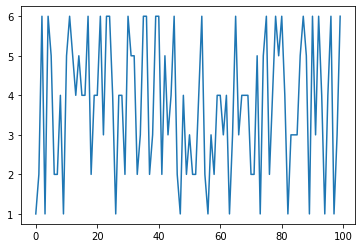

In [163]:
# your code here

hundred =pd.read_csv(r"C:\Users\Migue\Documents\GitHub\lab-understanding-descriptive-stats\data\roll_the_dice_hundred.csv")
hundred=hundred.sort_values("roll")
plt.plot(hundred["value"])

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [164]:
# your code here

values = list(hundred["value"])

mean(values)

3.74

#### 3.- Now, calculate the frequency distribution.


In [172]:
# your code here
def freq_dist(x):
    new_dict_comp = {item:x.count(item) for item in x}
    return new_dict_comp 
histo = freq_dist(values)
histo

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<BarContainer object of 6 artists>

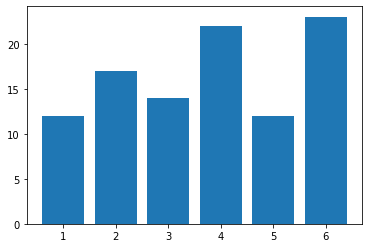

In [175]:
# your code here

plt.bar(histo.keys(), histo.values() )

In [ ]:
"""
your comments here: the average is litle above of what we expect (3.5) due to large representation of rolls woith value 6
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<BarContainer object of 6 artists>

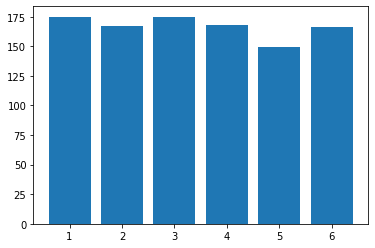

In [176]:
# your code here
hundred =pd.read_csv(r"C:\Users\Migue\Documents\GitHub\lab-understanding-descriptive-stats\data\roll_the_dice_thousand.csv")
values = list(hundred["value"])
def freq_dist(x):
    new_dict_comp = {item:x.count(item) for item in x}
    return new_dict_comp 
histo = freq_dist(values)
plt.bar(histo.keys(), histo.values() )

In [ ]:
"""
your comments here: here the bars look more even that is to be expected from a random dice rolls 
as the number of rolls increase the porpotion of outlyers(streaks) gets lower
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([ 2.,  2.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  2.,  0.,  1.,  5.,
         0.,  2.,  0.,  3.,  0.,  3.,  0., 11.,  0.,  6.,  0., 10.,  8.,
         0.,  8.,  0., 10.,  0.,  7.,  0., 11.,  0., 13.,  0., 14., 16.,
         0., 17.,  0., 18.,  0., 19.,  0., 23.,  0., 25.,  0., 20., 26.,
         0., 34.,  0., 24.,  0., 30.,  0., 22.,  0., 29., 33.,  0., 31.,
         0., 30.,  0., 30.,  0., 45.,  0., 27.,  0., 36., 32.,  0., 32.,
         0., 23.,  0., 29.,  0., 23.,  0., 17.,  0., 19., 19.,  0., 16.,
         0.,  9.,  0., 14.,  0., 12.,  0., 13.,  0., 13., 15.,  0.,  7.,
         0.,  7.,  0.,  8.,  0.,  4.,  0.,  2.,  4.,  0.,  7.,  0.,  2.,
         0.,  2.,  0.,  3.,  0.,  4.,  0.,  3.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.  ,  1.54,  2.08,  2.62,  3.16,  3.7 ,  4.24,  4.78,  5.32,
         5.86,  6.4 ,  6.94,  7.48,  8.02,  8.56,  9.1 ,  9.64, 10.18,
        10

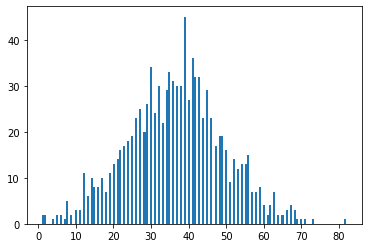

In [185]:
# your code here

ages =pd.read_csv(r"C:\Users\Migue\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population.csv")

plt.hist(ages["observation"], 150)
"the mean will be between 35-40 and the standard deviation will be near 5-10"

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [187]:
# your code here

print(ages["observation"].std() , ages["observation"].mean())

12.816499625976762 36.56


In [ ]:
"""
your comments here: Missed the std calcualtions the histogram does indead look large and short
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(array([  3.,   0.,  13.,   0.,   0.,  17.,   0.,   0.,  35.,   0.,   0.,
         41.,   0.,   0.,  78.,   0.,   0.,  98.,   0.,   0., 120.,   0.,
          0., 125.,   0.,   0., 139.,   0.,   0., 115.,   0.,   0.,  90.,
          0.,   0.,  61.,   0.,   0.,  31.,   0.,   0.,  22.,   0.,   0.,
          7.,   0.,   0.,   3.,   0.,   2.]),
 array([19.  , 19.34, 19.68, 20.02, 20.36, 20.7 , 21.04, 21.38, 21.72,
        22.06, 22.4 , 22.74, 23.08, 23.42, 23.76, 24.1 , 24.44, 24.78,
        25.12, 25.46, 25.8 , 26.14, 26.48, 26.82, 27.16, 27.5 , 27.84,
        28.18, 28.52, 28.86, 29.2 , 29.54, 29.88, 30.22, 30.56, 30.9 ,
        31.24, 31.58, 31.92, 32.26, 32.6 , 32.94, 33.28, 33.62, 33.96,
        34.3 , 34.64, 34.98, 35.32, 35.66, 36.  ]),
 <a list of 50 Patch objects>)

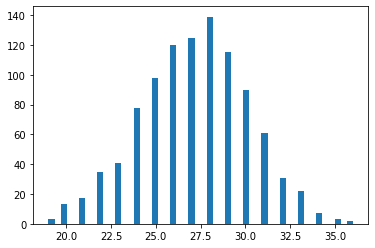

In [192]:
# your code here

ages2 =pd.read_csv(r"C:\Users\Migue\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population2.csv")

plt.hist(ages2["observation"], bins= 50)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here: yes it has a lower mean and less observations and the observations are less continous (in terms of ages)
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [193]:
# your code here
print(ages2["observation"].std() , ages2["observation"].mean())

2.969813932689186 27.155


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([ 1.,  2.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  1.,  0.,  2.,  0.,  2.,  0.,  4.,  0.,  2.,  0.,  5.,
         0.,  8.,  0.,  9.,  0., 10.,  0.,  9.,  0., 12.,  0., 11.,  0.,
        14.,  0., 11.,  0., 11.,  0., 19.,  0., 17.,  0., 15.,  0., 19.,
         0., 18.,  0., 25.,  0., 24.,  0., 21.,  0., 37.,  0., 17.,  0.,
        20.,  0., 31.,  0., 26.,  0., 31.,  0., 25.,  0., 29., 21.,  0.,
        25.,  0., 14.,  0., 22.,  0., 17.,  0., 24.,  0., 22.,  0., 15.,
         0., 25.,  0., 18.,  0., 21.,  0., 14.,  0., 17.,  0., 14.,  0.,
         9.,  0., 13.,  0., 10.,  0.,  8.,  0.,  6.,  0.,  8.,  0.,  6.,
         0.,  6.,  0.,  3.,  0., 12.,  0., 12.,  0., 15.,  0., 19.,  0.,
        22.,  0., 17.,  0., 17.,  0., 19.,  0., 11.,  0.,  8.,  0.,  6.,
         0.,  6.,  0.,  2.,  0.,  1.,  2.]),
 array([ 1.        ,  1.50666667,  2.01333333,  2.52      ,  3.02666667,
         3.53333333,  4.04      ,  4.54666667,  5.05333333,  5.56      ,
      

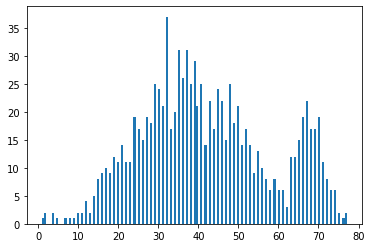

In [195]:
# your code here
ages2 =pd.read_csv(r"C:\Users\Migue\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population3.csv")

plt.hist(ages2["observation"], bins= 150)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [196]:
# your code here
print(ages2["observation"].std() , ages2["observation"].mean())

16.144705959865934 41.989


In [ ]:
"""
your comments here: the spkie near the 65-70 year old are skewing the distribution to the older side.
increasing teh mean and the stfd
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [199]:
# your code here

ages2["observation"].quantile([0.25,0.5, 0.75], interpolation='nearest')

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [ ]:
"""
your comments here: seeing that the median is lower that the mean implies that there is some overrepresetation of values on the last quartile
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [200]:
# your code here
ages2["observation"].quantile([0.1,0.2,0.8, 0.9], interpolation='nearest')

0.1    22.0
0.2    28.0
0.8    57.0
0.9    67.0
Name: observation, dtype: float64

In [ ]:
"""
your comments here:

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""